In [6]:
import hickle as hkl
import numpy as np
import os

In [7]:
def process_file(file):
    data = hkl.load(file)
    return data

In [8]:
all_data = {}
for file in os.listdir('.'):
    if "hkl" in file:
        data = process_file(file)
        print(data['task_training'], '\n\n') # there will be 0: [of len epochs #] task 0s epoch accuracy
        all_data[file] = data
print([(key,all_data[key]['f1_macro'],all_data[key]['f1_micro']) for key in all_data.keys()])


{0: [tensor(89.1895), tensor(89.6965), tensor(89.8191), tensor(89.9787), tensor(90.0157), tensor(89.9850), tensor(90.0779), tensor(90.0808), tensor(90.0610), tensor(90.2265), tensor(90.1773), tensor(90.2596), tensor(90.3045), tensor(90.2742), tensor(90.1447), tensor(90.2923), tensor(90.2572), tensor(90.3064), tensor(90.3872), tensor(90.3521), tensor(90.2948), tensor(90.3642), tensor(90.3895), tensor(90.3183), tensor(90.2936)], 1: [tensor(0.0173), tensor(0.0135), tensor(0.0269), tensor(0.0231), tensor(0.0192), tensor(0.0117), tensor(0.0137), tensor(0.0312), tensor(0.0234), tensor(0.0293), tensor(0.0119), tensor(0.0297), tensor(0.0158), tensor(0.0277), tensor(0.0277), tensor(0.0141), tensor(0.0141), tensor(0.0161), tensor(0.0261), tensor(0.0181), tensor(0.0245), tensor(0.0245), tensor(0.0265), tensor(0.0327), tensor(0.0347)], 2: [tensor(0.1336), tensor(0.1677), tensor(0.1848), tensor(0.2073), tensor(0.2275), tensor(0.0539), tensor(0.0476), tensor(0.0430), tensor(0.0594), tensor(0.0726), 

In [9]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

In [10]:

def print_confusion(data_mapping):
    fig, axs = plt.subplots(3, 1, figsize=(16, 16))  # Create a 1x2 subplot layout for each run
    for i, run in enumerate(data_mapping.keys()):
        print(run, 'running')
        cm = data_mapping[run]['confusion']  # Get the confusion matrix for the specific run
        cm_np = cm.cpu().numpy() if isinstance(cm, torch.Tensor) else np.array(cm)

        

        # Plot the confusion matrix for each subplot
        
        display = ConfusionMatrixDisplay(cm_np)  # Use the numpy array of the confusion matrix
        display.plot(include_values=True, cmap='viridis', ax=axs[i], xticks_rotation='vertical')  # Include values and use the 'viridis' colormap
        axs[i].set_title(f'Confusion Matrix for {run}')  # Set title for each subplot
            # axs[i].set_xticklabels(display.display_labels, rotation=45)  # Rotate x-axis labels for better visibility
            # axs[i].set_yticklabels(display.display_labels)  # Set y-axis labels

            # Annotate each cell with the numerical value
            # f

        
    plt.tight_layout()
    plt.show()


dict_keys(['multi_modal_clustering_features_SHL.hkl', 'cnn_features_SHL.hkl', 'baseline_hart_SHL.hkl'])
multi_modal_clustering_features_SHL.hkl running
cnn_features_SHL.hkl running
baseline_hart_SHL.hkl running


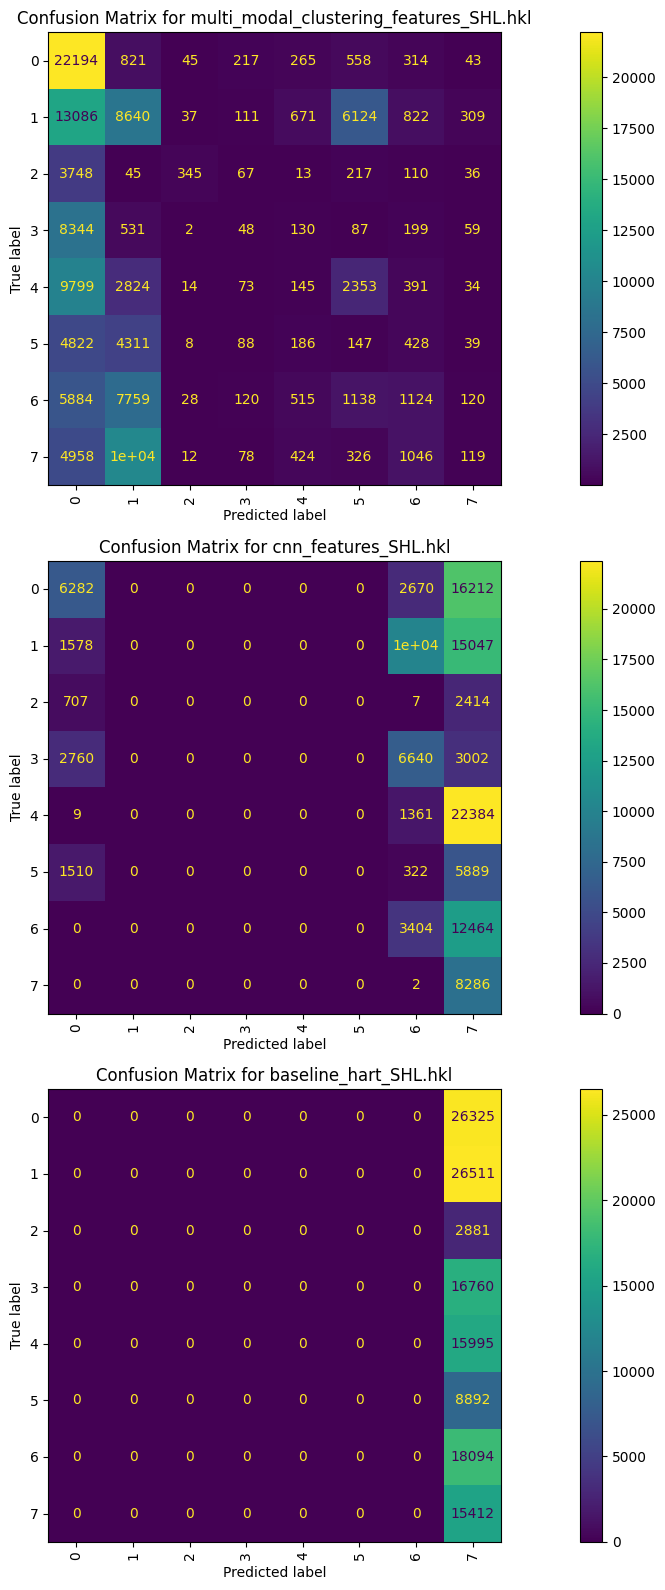

In [11]:
# to run the confusion matrix viewing
print(all_data.keys())
print_confusion(all_data)